# Text Classification with NLTK

## Sentiment Analysis

Sentiment analysis is the automated process of understanding an opinion about a given subject from written or spoken language.

In a world where we generate 2.5 quintillion bytes of data every day, sentiment analysis has become a key tool for making sense of that data. This has allowed companies to get key insights and automate all kind of processes.

All Image Sources are from Google

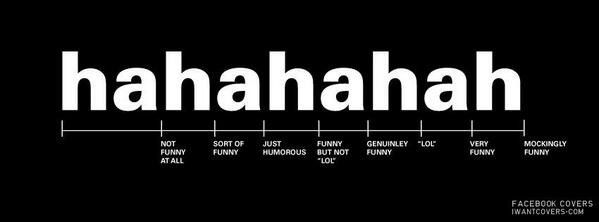

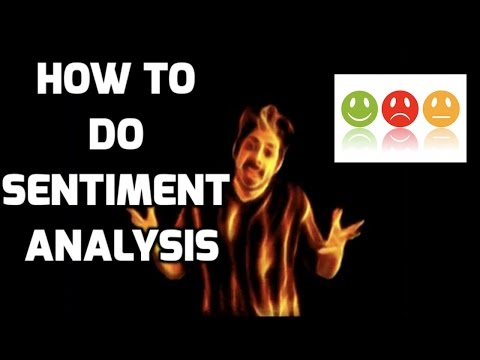

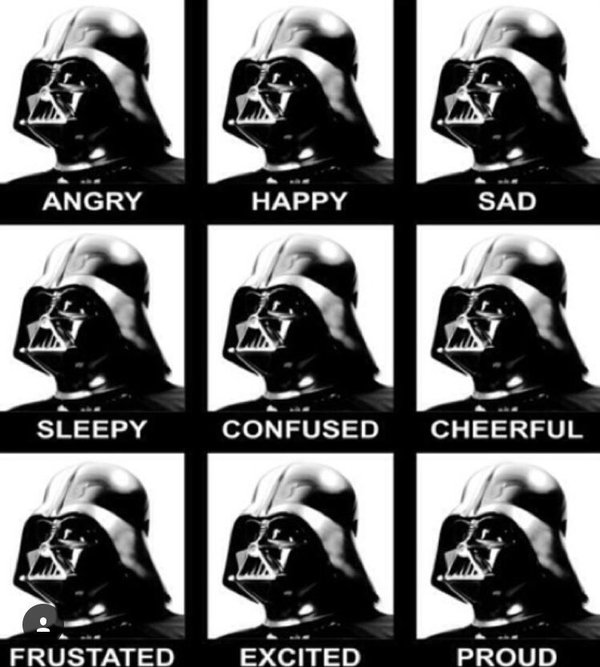

Lets Classify and Analyse Wine Reviews

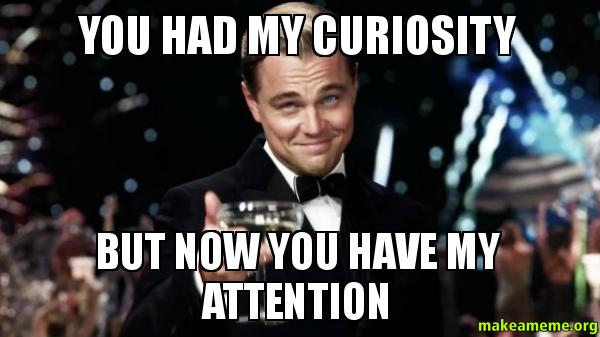

In [67]:
import numpy as np
import pandas as pd
import os
import re
import csv
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 


In [68]:
reviews_train = []
test_file='C:/Users/Chaitra C Mouli/Downloads/wine_reviews_test.csv'
train_file='C:/Users/Chaitra C Mouli/Downloads/wine_reviews.csv'


In [70]:
columns=[]
with open(train_file,encoding='utf8') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        columns.append(row)
positive_reviews_train=[(col[2],'positive') for col in columns if int(col[4])>= 87]

In [71]:
positive_reviews_train[0]

("Moorooduc's estate Pinot Noir is a solid value among the boutique offerings from the Mornington Peninsula. There's a supple cushioning of flesh wrapped around a firm backbone of acid, while the flavors run from black cherry and mint through earthier notes of brown sugar and roasted parsnip. Drink now through 2020.",
 'positive')

In [72]:
columns=[]
with open(train_file,encoding='utf8') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        columns.append(row)
negative_reviews_train=[(col[2],'negative') for col in columns if int(col[4]) < 87]

In [73]:
negative_reviews_train[0]

('The lightest of the 2012 single-vineyard Pinot Noirs from Giant Steps, this is an almost delicate wine with silky tannins. Notes of smoke, earth and mushroom mark the nose, while hints of pine boughs impart a slightly medicinal edge to the cherry fruit. Drink now.',
 'negative')

In [74]:
columns=[]
with open(test_file,encoding='utf8') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        columns.append(row)
reviews_test=[]
for col in columns:
    if int(col[4])<87:
        sentiment='negative'
    else: 
        sentiment='positive'
    reviews_test.append((col[2],sentiment))


In [75]:
reviews_test[33]

("Though it's designated as reserve-level, and lists rather high alcohol, this seems thin, stemmy and green. The fruit is nearly invisible. The addition of 14% Cabernet Franc has not had any noticeable impact. Drink up.",
 'negative')

In [76]:
reviews_test[5]

("A vibrantly aromatic wine, with notes of petrol, marmalade, citrus and flowers. It's rich and honeyed, with a lightly smoky, lingering finish.",
 'positive')

In [78]:
stop = stopwords.words('english')
train_reviews=positive_reviews_train+negative_reviews_train

In [79]:
filtered_train=[]
for passage in train_reviews:
    all_train_words={}
    for word in word_tokenize(passage[0]):
        if word.isalpha():
            if word not in stop:
                all_train_words[word]=True
            else:
                all_train_words[word]=False
        
    filtered_train.append((all_train_words,passage[1]))


In [80]:
filtered_train[0]

({'Moorooduc': True,
  'estate': True,
  'Pinot': True,
  'Noir': True,
  'is': False,
  'a': False,
  'solid': True,
  'value': True,
  'among': True,
  'the': False,
  'boutique': True,
  'offerings': True,
  'from': False,
  'Mornington': True,
  'Peninsula': True,
  'There': True,
  'supple': True,
  'cushioning': True,
  'of': False,
  'flesh': True,
  'wrapped': True,
  'around': True,
  'firm': True,
  'backbone': True,
  'acid': True,
  'while': False,
  'flavors': True,
  'run': True,
  'black': True,
  'cherry': True,
  'and': False,
  'mint': True,
  'through': False,
  'earthier': True,
  'notes': True,
  'brown': True,
  'sugar': True,
  'roasted': True,
  'parsnip': True,
  'Drink': True,
  'now': False},
 'positive')

In [81]:
filtered_test=[]
for passage in reviews_test:
    all_train_words={}
    for word in word_tokenize(passage[0]):
        if word.isalpha():
            if word not in stop:
                all_train_words[word]=True
            else:
                all_train_words[word]=False
        
    filtered_test.append((all_train_words))


In [100]:
text='hello'
text.isalpha()

True

In [82]:
filtered_test[0]

{'This': True,
 'blend': True,
 'is': False,
 'comprised': True,
 'of': False,
 'Cabernet': True,
 'Sauvignon': True,
 'Merlot': True,
 'and': False,
 'Franc': True,
 'The': True,
 'fruit': True,
 'flavors': True,
 'raspberry': True,
 'blackberry': True,
 'are': False,
 'light': True,
 'tangy': True,
 'the': False,
 'tannins': True,
 'mellow': True,
 'A': True,
 'note': True,
 'dark': True,
 'chocolate': True,
 'highlights': True,
 'finish': True}

### Naive Bayes Classifier

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [83]:
classifier = nltk.NaiveBayesClassifier.train(filtered_train)
print("Model generated")

Model generated


In [84]:
classifier.show_most_informative_features()

Most Informative Features
                     odd = True           negati : positi =     38.2 : 1.0
                  Grigio = True           negati : positi =     25.7 : 1.0
             lightweight = True           negati : positi =     21.5 : 1.0
                  peachy = True           negati : positi =     17.4 : 1.0
                 Tannins = True           positi : negati =     16.8 : 1.0
                    beet = True           negati : positi =     16.0 : 1.0
                 between = False          positi : negati =     15.5 : 1.0
                   pulpy = True           negati : positi =     15.4 : 1.0
                  softly = True           positi : negati =     13.9 : 1.0
                  attack = True           negati : positi =     13.2 : 1.0


In [85]:
classifier

In [92]:
classifier.classify(filtered_test[109])

'negative'

In [90]:
reviews_test[109]

('Smells oily, with a diesel-fuel note that some may find offputting. Rich and earthy on the palate, this bottling emphasizes spice, mineral and loam flavors, not the bright fruit of so many other Ontario products.',
 'negative')

In [91]:
filtered_test[109]

{'Smells': True,
 'oily': True,
 'with': False,
 'a': False,
 'note': True,
 'that': False,
 'some': False,
 'may': True,
 'find': True,
 'offputting': True,
 'Rich': True,
 'and': False,
 'earthy': True,
 'on': False,
 'the': False,
 'palate': True,
 'this': False,
 'bottling': True,
 'emphasizes': True,
 'spice': True,
 'mineral': True,
 'loam': True,
 'flavors': True,
 'not': False,
 'bright': True,
 'fruit': True,
 'of': False,
 'so': False,
 'many': True,
 'other': False,
 'Ontario': True,
 'products': True}

In [98]:
classifier.classify(filtered_test[0])

'positive'

In [97]:
reviews_test[0]

('This Bordeaux-style blend is comprised of 44% Cabernet Sauvignon, 43% Merlot and 13% Cabernet Franc. The fruit flavors of raspberry and blackberry are light and tangy, the tannins mellow. A note of dark chocolate highlights the finish.',
 'positive')

In [ ]:
print(nltk.classify.accuracy(classifier,filtered_test))